Frustrated
1    45
2    31
0    29
4    23
3    16
5    14
6     5
8     3
7     2
Name: count, dtype: int64
Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.38      0.23      0.29        13
           2       0.50      0.50      0.50        14
           3       0.87      0.93      0.90        14
           4       0.77      0.71      0.74        14
           5       0.73      0.85      0.79        13
           6       0.88      1.00      0.93        14
           7       0.93      1.00      0.96        13
           8       1.00      1.00      1.00        14

    accuracy                           0.76       122
   macro avg       0.74      0.76      0.75       122
weighted avg       0.74      0.76      0.75       122

Confusion Matrix:
Accuracy: 0.7622950819672131
Cross-va

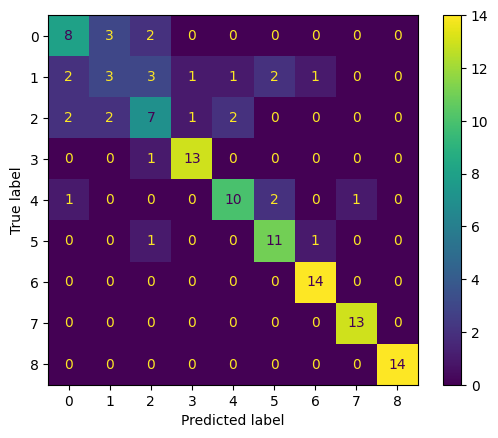

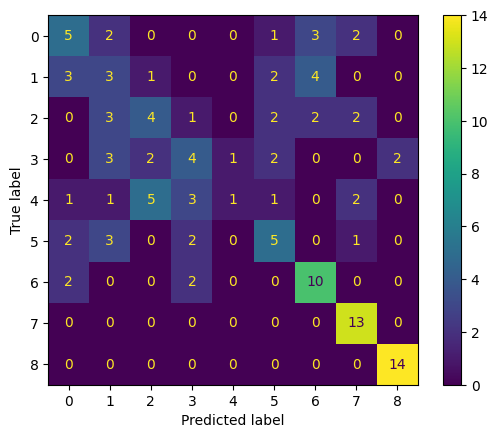

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load the dataset
data = pd.read_csv('HR_data.csv')

# Handle missing values if any
data = data.dropna()

# Encode categorical variables
le = LabelEncoder()
data['Puzzler'] = le.fit_transform(data['Puzzler'])
data['Phase'] = le.fit_transform(data['Phase'])
data['Round'] = le.fit_transform(data['Round'])
data['Cohort'] = le.fit_transform(data['Cohort'])

# Normalize/standardize HR features
scaler = StandardScaler()
hr_features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
data[hr_features] = scaler.fit_transform(data[hr_features])

# Features and target
X = data[hr_features + ['Puzzler', 'Phase', 'Round', 'Cohort']]
y = data['Frustrated']

# Check class distribution
print(y.value_counts())

# Handle class imbalance using Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
from scipy.stats import wilcoxon
import numpy as np

# Define the data (X_train, y_train, X_test, y_test)
# X_train, X_test, y_train, y_test should be defined beforehand

# Define the Random Forest model and hyperparameters for grid search
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=10), n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best model from grid search for Random Forest
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring='accuracy', n_jobs=-1)

print("Random Forest Classifier:")
print("Best Parameters:", grid_search_rf.best_params_)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Cross-validation scores:", cv_scores_rf)
print("Mean cross-validation score:", cv_scores_rf.mean())
print("Standard deviation of cross-validation scores:", cv_scores_rf.std())

# Define the Logistic Regression model and hyperparameters for grid search
lr_model = LogisticRegression(random_state=42, max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Grid Search with cross-validation for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=StratifiedKFold(n_splits=10), n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best model from grid search for Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Cross-validation scores for Logistic Regression
cv_scores_lr = cross_val_score(best_lr_model, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring='accuracy', n_jobs=-1)

print("\nLogistic Regression:")
print("Best Parameters:", grid_search_lr.best_params_)
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Cross-validation scores:", cv_scores_lr)
print("Mean cross-validation score:", cv_scores_lr.mean())
print("Standard deviation of cross-validation scores:", cv_scores_lr.std())

# Wilcoxon signed-rank test to compare the cross-validation scores of the two classifiers
w_stat, p_value = wilcoxon(cv_scores_rf, cv_scores_lr)

print("\nWilcoxon signed-rank test:")
print(f"w-statistic: {w_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("The difference in performance is not statistically significant.")


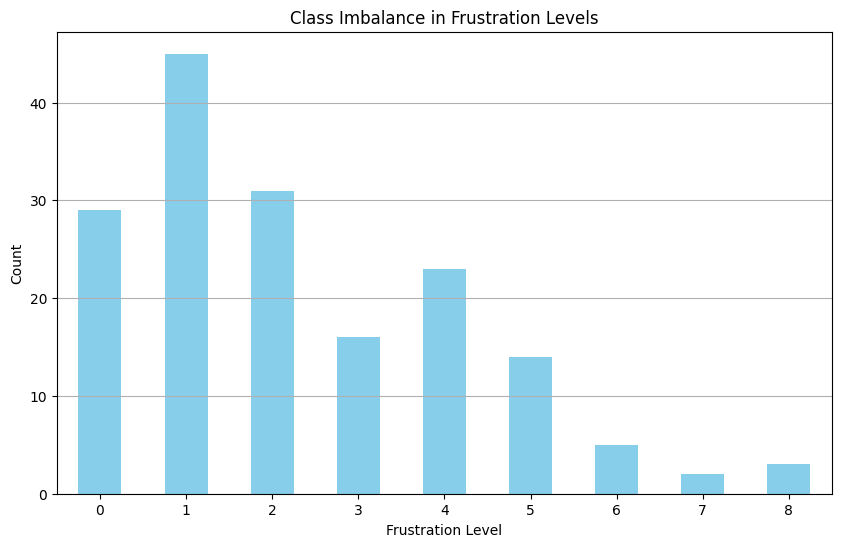

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data['Frustrated'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Class Imbalance in Frustration Levels')
plt.xlabel('Frustration Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save the plot
plt.savefig('frustration_imbalance.png')

# Show the plot
plt.show()

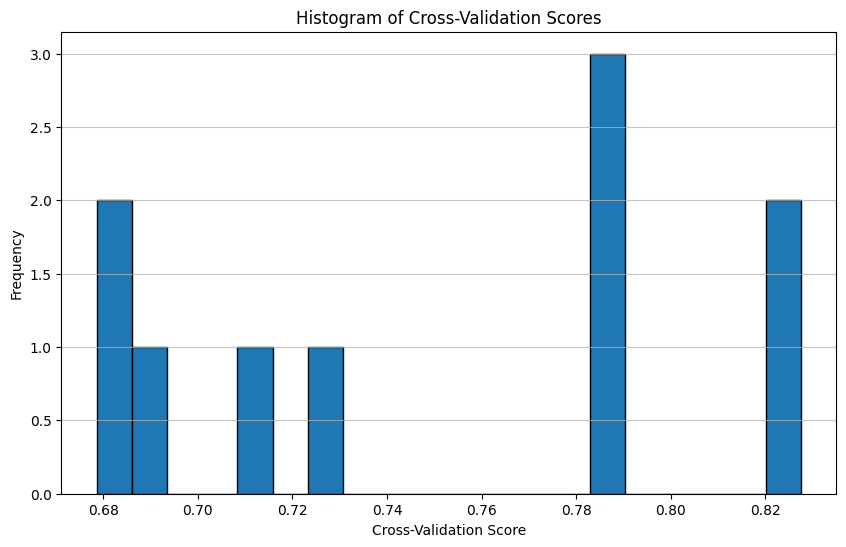

In [4]:
import matplotlib.pyplot as plt

# Values to be plotted
values = [0.72413793, 0.68965517, 0.82758621, 0.71428571, 0.78571429, 0.82142857,
          0.78571429, 0.67857143, 0.67857143, 0.78571429]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, edgecolor='black')
plt.title('Histogram of Cross-Validation Scores')
plt.xlabel('Cross-Validation Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()
